<a href="https://colab.research.google.com/github/uijun33/frontpage-uijun33.github.io/blob/main/Williams_R_Backtesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install backtesting
!pip install sklearn
!pip install quantstats

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for backtesting: filename=Backtesting-0.3.3-py3-none-any.whl size=173802 sha256=9eb4fdd007b0827672dedb6e9f686cb08adc439457afb501da7286b9f2523e92
  Stored in directory: /root/.cache/pip/wheels/e2/30/7f/19cbe31987c6ebdb47f1f510343249066711609e3da2d57176
Successfully built backtesting
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 1.3 MB/s eta 0:00:00


In [2]:
!pip install scikit-learn

In [3]:
# install
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, precision_score
from sklearn.datasets import make_classification


from backtesting import Strategy, Backtest

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


## Read Data

In [4]:
#Google Drive
from google.colab import drive
drive.mount('/content/drive')
# Set Data Extraction paramete

Mounted at /content/drive


In [5]:
### READ DATA ###

df = pd.read_csv("/content/drive/MyDrive/ML/BTCUSDT_15m_200101_230723.csv_edit.csv")

# data/BTCUSDT_15m_200101_230723.csv
# data/BTCUSDT_5m_200101_230723.csv

df.set_index("Time",inplace=True)
df.index = pd.to_datetime(df.index)
start_date = pd.Timestamp('2022-01-01')
df = df[df.index >= start_date]
df

,Open,High,Low,Close,Volume,%K_1H,%K_4H,%K_1D,%K_3D,%K_7D,...,cumret_1H,cumret_4H,cumret_1D,cumret_3D,cumret_7D,cumret_15D,cumret_1M,"RSI_""5m"": int(5/data_freq),15m",RSI_30m,RSI_1H
Time,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,46216.93,46527.26,46208.37,46332.51,386.65709,0.014473,0.408656,-0.543937,-0.543937,-0.795785,...,-0.279025,0.274782,-0.602042,-0.573682,-1.024488,-0.380937,-1.063041,0.225229,-0.269432,-0.428083
2022-01-01 00:15:00,46332.52,46421.27,46236.27,46375.42,319.99973,0.231618,0.515514,-0.514037,-0.514037,-0.782396,...,0.060645,0.462541,-0.428714,-0.529597,-1.024537,-0.364598,-1.055784,0.325839,-0.179732,-0.454904
2022-01-01 00:30:00,46375.42,46689.42,46360.19,46610.81,386.08077,0.717930,0.829585,-0.350017,-0.350017,-0.708952,...,0.393617,0.902335,-0.227599,-0.418745,-0.983830,-0.338723,-1.026429,0.451170,-0.127820,-0.400593
2022-01-01 00:45:00,46610.81,46731.39,46575.76,46656.13,410.59336,0.712210,0.843946,-0.318438,-0.318438,-0.694811,...,1.214199,1.112141,-0.286681,-0.450316,-0.995904,-0.328129,-1.034898,0.370817,-0.107424,-0.321254
2022-01-01 01:00:00,46656.14,46767.24,46574.06,46766.99,330.08774,0.999058,0.999486,-0.241191,-0.241191,-0.660222,...,1.198039,1.337050,-0.151018,-0.468473,-0.973133,-0.333189,-1.029319,0.356102,-0.051079,-0.301305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-22 23:00:00,29807.99,29814.56,29794.71,29799.64,102.41201,-0.278756,-0.557814,-0.869467,-0.459705,-0.381060,...,-0.115198,-0.118952,-0.158299,-0.109639,-0.280272,-0.288718,-0.262620,-0.454779,-0.270644,-0.256860
2023-07-22 23:15:00,29799.64,29799.65,29625.10,29697.18,1425.05726,-0.252980,-0.355220,-0.614442,-0.701784,-0.601532,...,-0.515175,-0.334457,-0.255982,-0.190627,-0.318587,-0.310237,-0.283380,-0.746986,-0.561905,-0.468402
2023-07-22 23:30:00,29697.18,29719.34,29644.26,29699.33,479.86932,-0.230697,-0.335987,-0.602942,-0.696704,-0.596906,...,-0.521157,-0.329650,-0.250308,-0.194357,-0.315241,-0.307513,-0.278715,-0.711672,-0.654434,-0.453874


In [6]:
### TRAIN TEST SPLIT ###
test_size = 0.3
shuffle_train = False
train_size = int((1 - test_size) * len(df))

df_train = df[:train_size]
df_test = df[train_size:]

In [7]:
def bollinger (data, n_lookback, n_std):
    hlc3 = pd.Series((data.High + data.Low + data.Close) / 3)
    mean, std = hlc3.rolling(n_lookback).mean(), hlc3.rolling(n_lookback).std()
    upper = mean + n_std * std
    lower = mean - n_std * std
    return upper, lower, mean

def williams_r(self, data, period=14):
    highest_high = data.High[-period:].max()
    lowest_low = data.Low[-period:].min()
    current_close = data.Close[-1]
    wr = ((highest_high - current_close) / (highest_high - lowest_low)) * -100.0
    return wr

# Strategy Lists

Williams R

In [82]:
import pandas as pd
from backtesting import Strategy
from backtesting.lib import crossover

class BBANDS (Strategy):
    def init(self):
        self.upper, self.lower, self.mean = self.I(bollinger, self.data, 25, 2)
        self.counter = 0
        self.commission = 0
        self.tp = 0.02
        self.sl = self.tp

    def williams_r(self, data):
        # Convert NumPy arrays to pandas Series
        high = pd.Series(data.High)
        low = pd.Series(data.Low)
        close = pd.Series(data.Close)

        # Implement your Williams %R calculation logic here
        # Calculate and return the Williams %R value as a numeric value
        try:
            # Your Williams %R calculation logic here
            highest_high = high.rolling(window=14).max()
            lowest_low = low.rolling(window=14).min()
            wr = (highest_high - close) / (highest_high - lowest_low) * -100
            return wr
        except Exception as e:
            print(f"Error in Williams %R calculation: {e}")
            return None  # Return None if there's an error

    def next(self):
        # Skip the cold start period with too few values available
        N_TRAIN = 25
        if len(self.data) < N_TRAIN:
            return

        # Define Variables
        upper, upper_t1 = self.upper[[-1, -2]]
        lower, lower_t1 = self.lower[[-1, -2]]
        price, price_t1 = self.data.Close[[-1, -2]]
        mean = self.mean[-1]
        crossed_upper = (price > upper) * (price_t1 <= upper_t1)
        crossed_lower = (price < lower) * (price_t1 >= lower_t1)
        current_time = self.data.index[-1]

        # Williams %R Calculation
        wr = self.williams_r(self.data)

        # BBANDS Strategy - Buy
        if crossed_lower and wr is not None and wr.iloc[-1] < -85:
            self.buy(size=0.2, tp=upper, sl=price * (1 - self.sl))

        # BBANDS Strategy - Sell
        if crossed_upper and wr is not None and wr.iloc[-1] > -15:
            self.sell(size=0.2, tp=lower, sl=price * (1 + self.sl))

class BBANDS_ML (Strategy):
    def init(self):
        self.upper, self.lower, self.mean = self.I(bollinger, self.data, 25, 2)
        self.counter = 0
        self.commission = 0
        self.tp = 0.02
        self.sl = self.tp

    def williams_r(self, data):
        # Convert NumPy arrays to pandas Series
        high = pd.Series(data.High)
        low = pd.Series(data.Low)
        close = pd.Series(data.Close)

        # Implement your Williams %R calculation logic here
        # Calculate and return the Williams %R value as a numeric value
        try:
            # Your Williams %R calculation logic here
            highest_high = high.rolling(window=14).max()
            lowest_low = low.rolling(window=14).min()
            wr = (highest_high - close) / (highest_high - lowest_low) * -100
            return wr
        except Exception as e:
            print(f"Error in Williams %R calculation: {e}")
            return None  # Return None if there's an error
    def model_proba (self):
        data_series = self.data.df.iloc[-1][5:]
        X = data_series.to_frame().T
        proba = classifier.predict_proba(X)[0][1]
        return proba

    def next(self):
        # Skip the cold start period with too few values available
        N_TRAIN = 25
        if len(self.data) < N_TRAIN:
            return

        # Define Variables
        upper, upper_t1 = self.upper[[-1, -2]]
        lower, lower_t1 = self.lower[[-1, -2]]
        price, price_t1 = self.data.Close[[-1, -2]]
        mean = self.mean[-1]
        crossed_upper = (price > upper) * (price_t1 <= upper_t1)
        crossed_lower = (price < lower) * (price_t1 >= lower_t1)
        current_time = self.data.index[-1]

        # Williams %R Calculation
        wr = self.williams_r(self.data)

        # BBANDS Strategy - Buy
        if crossed_lower and wr is not None and wr.iloc[-1] < -85 and self.model_proba() > 0.6:
            self.buy(size=0.2, tp=upper, sl=price * (1 - self.sl))

        # BBANDS Strategy - Sell
        if crossed_upper and wr is not None and wr.iloc[-1] > -15 and self.model_proba() > 0.6:
            self.sell(size=0.2, tp=lower, sl=price * (1 + self.sl))



In [57]:



        # 물타기 버전

#         # Position Counter 계산 (+1 for long, -1 for short)
#         self.counter = 0
#         for trade in self.trades:
#             self.counter += 1 if trade.is_long else 0
#             self.counter += -1 if trade.is_short else 0




#         if crossed_lower: # Go long
#             if self.counter < 0:
#                 self.position.close()
#                 self.buy(size = 0.2)
#             elif self.counter in [0,1]:
#                 self.buy(size = 0.2)
#             elif self.counter == 2:
#                 self.buy(size = 0.4,
#                          tp = price*(1+self.tp),
#                          sl = price*(1-self.sl))
#             if self.counter < 3:
#                 for trade in self.trades:
#                     if trade.is_long:
#                         trade.tp = price*(1+self.tp)
#                         trade.sl = price*(1-self.sl)

#         if crossed_upper: # Go short
#             if self.counter > 0:
#                 self.position.close()
#                 self.sell(size = 0.2)
#             elif self.counter in [0,-1]:
#                 self.sell(size = 0.2)
#             elif self.counter == -2:
#                 self.sell(size = 0.4,
#                           tp = price*(1-self.tp),
#                           sl = price*(1+self.sl))
#             if self.counter > -3:
#                 for trade in self.trades:
#                     if trade.is_short:
#                         trade.tp = price*(1-self.tp)
#                         trade.sl = price*(1+self.sl)





In [78]:
test = Backtest(df_train, BBANDS, cash=1e8, margin = 1, commission = 0)
stats = test.run()

In [86]:
test = Backtest(df_train, BBANDS_ML, cash=1e8, margin = 1, commission = 0)
stat1 = test.run()

In [79]:
stats

Start                     2022-01-01 00:00:00
End                       2023-02-02 13:15:00
Duration                    397 days 13:15:00
Exposure Time [%]                   75.496515
Equity Final [$]             113254817.133756
Equity Peak [$]              121830506.226449
Return [%]                          13.254817
Buy & Hold Return [%]              -48.634425
Return (Ann.) [%]                   11.929484
Volatility (Ann.) [%]               15.682142
Sharpe Ratio                         0.760705
Sortino Ratio                        1.177265
Calmar Ratio                         1.357688
Max. Drawdown [%]                   -8.786614
Avg. Drawdown [%]                   -0.378261
Max. Drawdown Duration      101 days 19:45:00
Avg. Drawdown Duration        1 days 17:39:00
# Trades                                 1539
Win Rate [%]                        65.107212
Best Trade [%]                       9.659558
Worst Trade [%]                     -2.071584
Avg. Trade [%]                    

In [87]:
stat1

Start                     2022-01-01 00:00:00
End                       2023-02-02 13:15:00
Duration                    397 days 13:15:00
Exposure Time [%]                   62.097155
Equity Final [$]             128312651.984199
Equity Peak [$]              134173707.167365
Return [%]                          28.312652
Buy & Hold Return [%]              -48.634425
Return (Ann.) [%]                   25.505359
Volatility (Ann.) [%]               13.172616
Sharpe Ratio                         1.936241
Sortino Ratio                        3.561858
Calmar Ratio                         4.744179
Max. Drawdown [%]                   -5.376138
Avg. Drawdown [%]                   -0.227303
Max. Drawdown Duration      111 days 20:30:00
Avg. Drawdown Duration        1 days 01:09:00
# Trades                                 1247
Win Rate [%]                        70.569366
Best Trade [%]                       4.784547
Worst Trade [%]                     -2.027438
Avg. Trade [%]                    

In [25]:
stats._trades[-30:]

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,PnL,ReturnPct,EntryTime,ExitTime,Duration
1509,-978,37224,37230,23065.22,22723.481416,334220.334818,0.014816,2023-01-23 18:00:00,2023-01-23 19:30:00,0 days 01:30:00
1510,-980,37256,37286,23088.48,22809.433197,273465.867204,0.012086,2023-01-24 02:00:00,2023-01-24 09:30:00,0 days 07:30:00
1511,644,37385,37423,22534.33,22756.065150,142797.436381,0.009840,2023-01-25 10:15:00,2023-01-25 19:45:00,0 days 09:30:00
1512,635,37338,37425,22693.98,22919.600000,143268.700000,0.009942,2023-01-24 22:30:00,2023-01-25 20:15:00,0 days 21:45:00
1513,811,37350,37430,22377.00,23178.018309,649625.848928,0.035797,2023-01-25 01:30:00,2023-01-25 21:30:00,0 days 20:00:00
1514,364,37338,37430,22693.98,23079.897472,140473.959641,0.017005,2023-01-24 22:30:00,2023-01-25 21:30:00,0 days 23:00:00
1515,-996,37430,37431,22989.63,23448.922800,-457455.628800,-0.019978,2023-01-25 21:30:00,2023-01-25 21:45:00,0 days 00:15:00
1516,-986,37496,37504,23127.49,22889.209849,234944.228599,0.010303,2023-01-26 14:00:00,2023-01-26 16:00:00,0 days 02:00:00
1517,797,37540,37597,22925.08,23127.653471,161451.056543,0.008836,2023-01-27 01:00:00,2023-01-27 15:15:00,0 days 14:15:00
1518,995,37538,37597,22962.02,23121.187992,158372.151785,0.006932,2023-01-27 00:30:00,2023-01-27 15:15:00,0 days 14:45:00


In [26]:
curve = stats._equity_curve

In [27]:
curve

,Equity,DrawdownPct,DrawdownDuration
Time,,,
2022-01-01 00:00:00,1.000000e+08,0.000000,NaT
2022-01-01 00:15:00,1.000000e+08,0.000000,NaT
2022-01-01 00:30:00,1.000000e+08,0.000000,NaT
2022-01-01 00:45:00,1.000000e+08,0.000000,NaT
2022-01-01 01:00:00,1.000000e+08,0.000000,NaT
...,...,...,...
2023-02-02 12:15:00,1.132263e+08,0.070624,NaT
2023-02-02 12:30:00,1.132567e+08,0.070375,NaT
2023-02-02 12:45:00,1.132347e+08,0.070556,NaT


In [28]:
test.plot()

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:122: UserWarning: Data contains too many candlesticks to plot; downsampling to '1H'. See `Backtest.plot(resample=...)`
  warnings.warn(f"Data contains too many candlesticks to plot; downsampling to {freq!r}. "
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:148: FutureWarning: Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  new_bar_idx = new_index.get_loc(mean_time, method='nearest')
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:148: FutureWarning: Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  new_bar_idx = new_index.get_loc(mean_time, method='nearest')
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:148: FutureWarning: Passing method to Int64Index.get_loc is deprecated and will raise in

KeyboardInterrupt: ignored

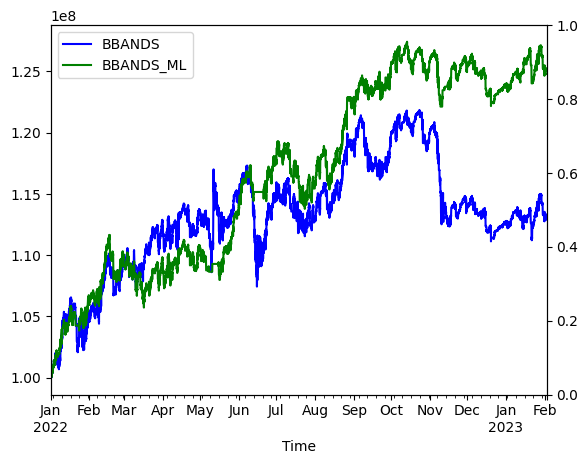

In [60]:
# Plotting df1 and df2 on the primary y-axis
fig, ax1 = plt.subplots()
curve2 = stats._equity_curve
curve3 = stat1._equity_curve
curve2['Equity'].plot(kind='line', ax=ax1, color='b', label='BBANDS')
curve3['Equity'].plot(kind='line', ax=ax1, color='g', label='BBANDS_ML')

# Creating the secondary y-axis
ax2 = ax1.twinx()

# Plotting df3 on the secondary y-axis
#df_test['Close'].plot(kind='line', ax=ax2, color='orange', label='BTC')

# Adding a legend
fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)

plt.show()

In [33]:
test.plot()

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:122: UserWarning: Data contains too many candlesticks to plot; downsampling to '1H'. See `Backtest.plot(resample=...)`
  warnings.warn(f"Data contains too many candlesticks to plot; downsampling to {freq!r}. "
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:148: FutureWarning: Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  new_bar_idx = new_index.get_loc(mean_time, method='nearest')
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:148: FutureWarning: Passing method to Int64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  new_bar_idx = new_index.get_loc(mean_time, method='nearest')
/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:148: FutureWarning: Passing method to Int64Index.get_loc is deprecated and will raise in

KeyboardInterrupt: ignored

In [62]:
# Make a copy
df_trades = stats._trades.copy()
df_market = df.copy()
df_market.reset_index(inplace=True)


# Add market features
df_trades = df_trades.merge(df_market, left_on='EntryTime', right_on='Time', how='left')


# Add Output Classifier
df_trades['target'] = np.where(df_trades['PnL'] > 0, 1, 0)
print(df_trades['target'].value_counts())


# Drop unnecessary columns before training model
cols_to_drop = ['Size','EntryBar','ExitBar','EntryPrice','ExitPrice','PnL','EntryTime','ExitTime','Duration',
               'Time','Open','High','Low','Volume', 'ReturnPct','Close']
df_trades = df_trades.drop(columns=cols_to_drop)

# Check work
df_trades.head()



1    1002
0     537
Name: target, dtype: int64


,%K_1H,%K_4H,%K_1D,%K_3D,%K_7D,%K_15D,%K_1M,cumret_1H,cumret_4H,cumret_1D,cumret_3D,cumret_7D,cumret_15D,cumret_1M,"RSI_""5m"": int(5/data_freq),15m",RSI_30m,RSI_1H,target
0,0.863899,-0.125282,0.053467,-0.085365,-0.590446,-0.537207,-0.360203,0.170725,-0.244976,-0.606581,-0.075957,-0.864742,-0.183830,-0.951347,-0.142428,0.070740,0.147541,1
1,0.823597,0.861785,0.483974,0.255949,-0.437613,-0.398770,-0.297403,1.232625,0.722538,-0.398622,-0.164307,-0.771830,-0.155079,-0.924160,0.306110,0.159377,0.172791,1
2,0.823597,0.861785,0.483974,0.255949,-0.437613,-0.398770,-0.297403,1.232625,0.722538,-0.398622,-0.164307,-0.771830,-0.155079,-0.924160,0.306110,0.159377,0.172791,1
3,0.440781,0.637557,0.824170,0.446893,-0.352112,-0.315580,-0.262270,1.314019,1.019893,0.386495,-0.008793,-0.726961,-0.030018,-0.922746,0.390839,0.343360,0.220103,1
4,0.648527,0.712651,0.096488,0.213528,-0.456608,-0.430027,-0.200089,0.628369,0.354989,-0.078622,-0.006012,-0.680261,-0.104064,-0.871406,0.105720,0.043060,0.034278,1


In [83]:

X = df_trades.iloc[:,:-1]
y = df_trades.iloc[:,-1]

test_size = 0.4
shuffle_train = True
train_size = int((1 - test_size) * len(X))

X_train = X[:train_size]
y_train = y[:train_size]
X_test = X[train_size:]
y_test = y[train_size:]

# Now, shuffle only the training data. Here, we shuffle indices to keep X and y in sync
if shuffle_train:
    train_indices = np.arange(X_train.shape[0])
    np.random.shuffle(train_indices)
    X_train = X_train.iloc[train_indices]
    y_train = y_train.iloc[train_indices]

print("Shape of X_train ", X_train.shape)
print("Shape of y_train ", y_train.shape)

Shape of X_train  (923, 17)
Shape of y_train  (923,)


In [84]:
ne = 60
md = 3
mf = "log2"

classifier = RandomForestClassifier(
    n_estimators = ne,
    max_depth= md,
    random_state=0)

classifier.fit(X_train,y_train)

train_yhat = classifier.predict(X_train)
test_yhat = classifier.predict(X_test)
test_yhat_proba = classifier.predict_proba(X_test)
print(classification_report(y_train,train_yhat))
print(classification_report(y_test, test_yhat))

              precision    recall  f1-score   support

           0       0.97      0.19      0.31       339
           1       0.68      1.00      0.81       584

    accuracy                           0.70       923
   macro avg       0.82      0.59      0.56       923
weighted avg       0.79      0.70      0.63       923

              precision    recall  f1-score   support

           0       0.69      0.06      0.10       198
           1       0.69      0.99      0.81       418

    accuracy                           0.69       616
   macro avg       0.69      0.52      0.46       616
weighted avg       0.69      0.69      0.58       616



In [85]:
# convert proba to DF
df_proba = pd.DataFrame(test_yhat_proba, columns=['proba_0', 'proba_1'])

# add back index
df_proba.index = df_trades.iloc[train_size:].index

# add back actuals
df_proba["pred"] = test_yhat
df_proba["actual"] = y_test

# Filter out
confidence = 0.6

df_proba_filtered = df_proba[(df_proba['proba_0'] < 1-confidence) | (df_proba['proba_0'] > confidence)]
len(df_proba_filtered)/len(df_proba)

y_test_filtered = df_proba_filtered['actual']
test_yhat_filtered = df_proba_filtered['pred']

# Show summary report
filtered = len(df_proba_filtered)/len(df_proba)
print("filtered:",filtered)
print(classification_report(y_test_filtered, test_yhat_filtered))

filtered: 0.887987012987013
              precision    recall  f1-score   support

           0       1.00      0.04      0.07       163
           1       0.71      1.00      0.83       384

    accuracy                           0.71       547
   macro avg       0.85      0.52      0.45       547
weighted avg       0.80      0.71      0.60       547

